# Face Recognition 

#### Importamos Librerias

In [8]:
import os 
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Extraemos datos

In [9]:
dataDir = 'dataset/part1/part1/'
listImages = os.listdir(dataDir)

map_characters = {
    0: 'Male',
    1: 'Female'
}


#### Creamos el Dataset

In [10]:
images = []
ages = []
genders = []



for filename in listImages:
    file = filename.split('_')
    age = file[0]
    gender = file[1]
    ages.append(age)
    genders.append(gender)
    if filename.endswith('.jpg'):
        filePath = os.path.join(dataDir,filename)
        image = cv2.imread(filePath)
        if image is None:
            print(f"Error al leer la imagen: {filePath}")
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image= cv2.resize(image, (64,64))
        images.append(image)

#### Visualización de las imagenes

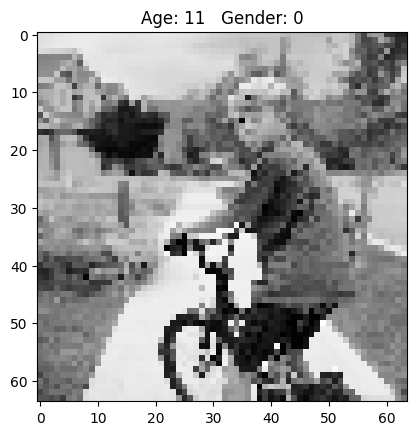

In [11]:
position = 155
if images:
    plt.title(f'Age: {ages[position]}   Gender: {genders[position]}')
    plt.imshow(images[position], cmap='gray')
    plt.show()

#### Preprocesamiento

In [12]:
# Convertimos a un array de numpy
images = np.array(images)
ages = np.array(ages, dtype=int)
genders = np.array(genders, dtype=int)

# Normalizamos de las imagenes
images = images / 255


#### Dividimos en conjunto de entrenamiento y test 

In [13]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, genders, test_size=0.2, random_state=42)

#### Arquitectura CNN

In [14]:
# Construir un modelo simple de clasificación con TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64,64,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Supongo que tienes dos géneros
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Entrenamos el modelo

In [15]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5512 - loss: 0.6946 - val_accuracy: 0.5631 - val_loss: 0.6630
Epoch 2/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6226 - loss: 0.6384 - val_accuracy: 0.6538 - val_loss: 0.6171
Epoch 3/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6617 - loss: 0.6025 - val_accuracy: 0.6760 - val_loss: 0.5988
Epoch 4/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7003 - loss: 0.5633 - val_accuracy: 0.6637 - val_loss: 0.6000
Epoch 5/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7025 - loss: 0.5486 - val_accuracy: 0.6864 - val_loss: 0.5851
Epoch 6/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7409 - loss: 0.5092 - val_accuracy: 0.7022 - val_loss: 0.5675
Epoch 7/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7748 - loss: 0.4598 - val_accuracy: 0.6987 - val_loss: 0.5749
Epoch 8/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8024 - loss: 0.4190 - val_accu

#### Evaluamos el modelo 

In [16]:

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7122 - loss: 0.8265
Precisión en el conjunto de prueba: 0.7001972198486328


#### Guardamos el modelo

In [17]:
model.save('gender_classification_model.h5')

#### Nuestra camara

In [18]:
# Función que toma un frame de nuetra camara
def capture_image():
    # Iniciar la captura de video (0 es usualmente el índice de la cámara por defecto)
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("No se pudo abrir la cámara")
        exit()

    print("La cámara se abrió correctamente")

    while True:
        ret, frame = cap.read()
        
        cv2.imwrite('frame.jpg', frame)
        print("Frame capturado y guardado como 'frame.jpg'")

        break
        
    # Liberar la captura
    cap.release()
    print("Captura liberada correctamente")
    return frame


La cámara se abrió correctamente
Frame capturado y guardado como 'frame.jpg'
Captura liberada correctamente


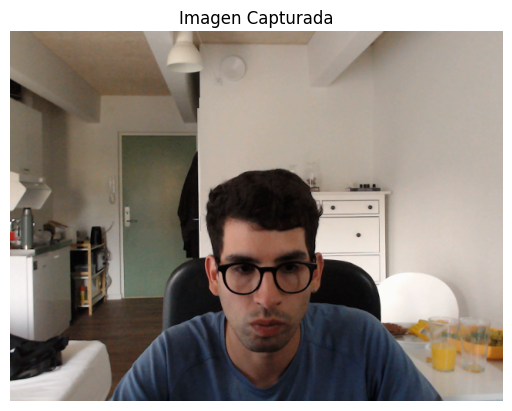

In [19]:
# Probamos que nuestra camara este funcionando 
captured_image = capture_image()
captured_image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB)
plt.title('Imagen Capturada')
plt.imshow(captured_image)
plt.axis('off')
plt.show() 

#### Testeamos el modelo con nuestra camara

La cámara se abrió correctamente
Frame capturado y guardado como 'frame.jpg'


Captura liberada correctamente
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicción: Hombre ([0.08690561])


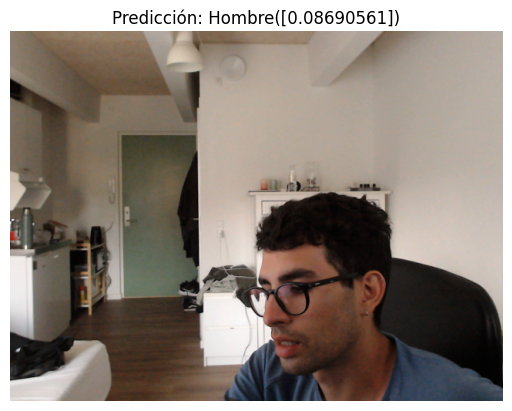

In [29]:
captured_image = capture_image()
captured_image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (64, 64))
image = image / 255.0
image = np.expand_dims(image, axis=-1)  # Añadir dimensión para el canal
image = np.expand_dims(image, axis=0)
model = tf.keras.models.load_model('gender_classification_model.h5')
prediction = model.predict(image)
gender = 'Hombre' if prediction[0] <= 0.5 else "Mujer"
print(f"Predicción: {gender} ({prediction[0]})")
plt.title(f"Predicción: {gender}({prediction[0]})")
plt.imshow(captured_image)
plt.axis('off')
plt.show() 